### What is KNN?

In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.

In kNN regression, the output is simply some property value for the object. This value is the average of the values of k nearest neighbours.

kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more to the average than the more distant ones.

Eager learners mean when giving training data points, we will construct a generalized model before performing prediction on given new points to classify. We can think of such learners as being ready, active and eager to classify new data points.

Lazy learning means there is no need for learning or training of the model and all of the data points are used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. They merely store the training dataset and waits until classification needs to perform. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

Unlike eager learners, lazy learners do less work in the training phase and more work in the testing phase to make a classification.

- How it works?

    - The kNN algorithm intuition is very simple to understand. It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.
    
- How to find optimal k?

    - While building the kNN classifier model, one question that come to my mind is what should be the value of nearest neighbours (k) that yields highest accuracy. This is a very important question because the classification accuracy depends upon our choice of k.

    - The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.

    - The data scientists choose an odd value of k if the number of classes is even. We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
X_train=pd.read_csv("X_train.csv",index_col=0)
X_train.head()

,intl_plan,number_customer_service_calls,number_vmail_messages,total_day_charge,total_day_minutes,total_eve_charge_new,total_eve_minutes,total_intl_calls,total_intl_charge_new,total_intl_minutes,total_night_charge,total_night_minutes
0,-0.32324,-0.436676,-0.572549,0.399549,0.399172,0.751448,0.751063,-0.177160,1.178988,1.172792,-0.522416,-0.520392
1,-0.32324,0.328885,1.642284,0.924592,0.924322,1.722281,1.720473,-0.584236,-1.222308,-1.217542,-0.460838,-0.461013
2,-0.32324,-1.202236,-0.572549,0.530537,0.530923,1.023840,1.024081,1.044069,0.924102,0.919272,1.580036,1.579653
3,-0.32324,1.094445,2.232906,-0.309968,-0.309689,-1.066829,-1.067073,-0.584236,1.031422,1.027924,2.877575,2.878078
4,-0.32324,-1.202236,1.716112,0.709554,0.709066,-1.313611,-1.314372,0.636993,-0.310084,-0.312113,-1.613229,-1.612969


In [3]:
X_test=pd.read_csv("X_test.csv",index_col=0)
X_test.head()

,intl_plan,number_customer_service_calls,number_vmail_messages,total_day_charge,total_day_minutes,total_eve_charge_new,total_eve_minutes,total_intl_calls,total_intl_charge_new,total_intl_minutes,total_night_charge,total_night_minutes
1501,-0.32324,-1.202236,-0.572549,1.709428,1.709265,-1.835114,-1.834687,-0.991312,0.883856,0.883055,-0.293698,-0.294751
2586,-0.32324,-0.436676,-0.572549,-0.300144,-0.300410,0.106553,0.106110,-0.991312,0.414329,0.412231,-0.113362,-0.112655
2653,-0.32324,-0.436676,1.642284,-2.202743,-2.202457,1.077387,1.077497,0.229917,0.776536,0.774403,0.506818,0.504889
1055,-0.32324,-0.436676,-0.572549,-0.040352,-0.040618,-1.071485,-1.071030,-0.991312,-0.632046,-0.638067,-1.243760,-1.242839
705,-0.32324,-0.436676,-0.572549,-2.178729,-2.178334,0.602447,0.600706,0.229917,-0.632046,-0.638067,-0.623580,-0.623316


In [4]:
y_train=pd.read_csv("y_train.csv",index_col=0)
y_train.head()

,churned
0,0
1,0
2,0
3,0
4,0


In [5]:
y_test=pd.read_csv("y_test.csv",index_col=0)
y_test.head()

,churned
1501,0
2586,0
2653,0
1055,0
705,0


### Build the KNN model with default parameters

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=5, #Number of neighbors to use by default 
       metric='minkowski',  #Metric to use for distance computation. Default is "minkowski"
       n_jobs=-1)   #The number of parallel jobs to run for neighbors search, -1 for all processors

In [7]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [8]:
y_pred_knn1 = knn1.predict(X_test)
len(y_pred_knn1)

1250

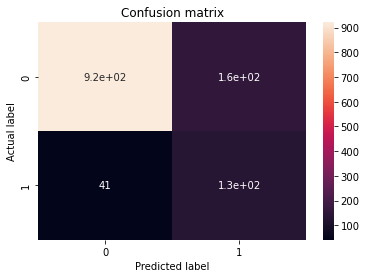

In [9]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_test,y_pred_knn1)
sns.heatmap(cm1, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
knn1_acc = accuracy_score(y_test,y_pred_knn1)
print("Base KNN-Accuracy:", knn1_acc)
knn1_rec = recall_score(y_test,y_pred_knn1)
print("Base KNN-Recall score:",knn1_rec)
knn1_f1 = f1_score(y_test,y_pred_knn1)
print("Base KNN-F1 score:",knn1_f1)
knn1_ps = precision_score(y_test,y_pred_knn1)
print("Base KNN-Precision score:",knn1_ps)

Base KNN-Accuracy: 0.8432
Base KNN-Recall score: 0.764367816091954
Base KNN-F1 score: 0.5757575757575758
Base KNN-Precision score: 0.4618055555555556


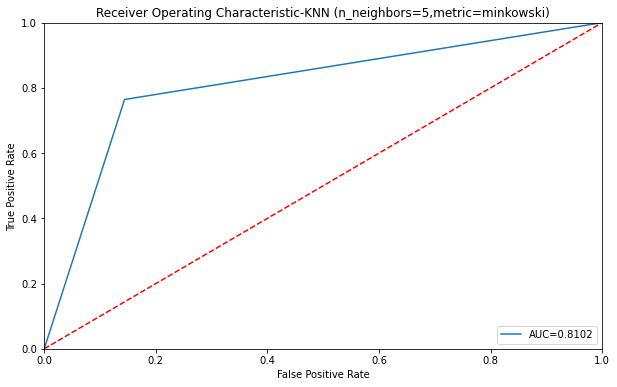

In [11]:
fpr, tpr, _ = roc_curve(y_test,y_pred_knn1)
auc = round(roc_auc_score(y_test,y_pred_knn1),4)

#create ROC curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic-KNN (n_neighbors=5,metric=minkowski)')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Hyper parameter tuning

In [12]:
#grid search CV
from sklearn.model_selection import GridSearchCV

param_grid_knn ={'n_neighbors':np.arange(11,20),#Number of neighbors
                 'weights':['uniform', 'distance'],#Weight function used in prediction
               #  'leaf_size':list(range(1,11)),##Leaf size passed to BallTree or KDTree
                 'algorithm':['auto', 'ball_tree', 'kd_tree']#Algorithm used to compute the nearest neighbors
                }

In [13]:
gs_knn = GridSearchCV(estimator=knn1,#estimator object
                  param_grid=param_grid_knn,#tuning parameters
                  cv=10, #integer, to specify the number of folds in a `(Stratified)KFold`
                  scoring = 'accuracy', #evaluation metrics
                  verbose=0, #Controls the verbosity: the higher, the more messages
                  error_score='raise',
                  return_train_score=True #If False, the cv_results_ attribute will not include training scores
                 )
gs_knn

GridSearchCV(cv=10, error_score='raise',
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': array([11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [14]:
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': array([11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [15]:
df_knn = pd.DataFrame(gs_knn.cv_results_)
df_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.052489,0.014265,0.369853,0.799815,auto,11,uniform,"{'algorithm': 'auto', 'n_neighbors': 11, 'weig...",0.895963,0.900621,...,0.919516,0.921071,0.921430,0.921084,0.922639,0.921257,0.920048,0.920912,0.921062,0.000799
1,0.036115,0.012391,0.065205,0.008946,auto,11,distance,"{'algorithm': 'auto', 'n_neighbors': 11, 'weig...",0.911491,0.914596,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.052023,0.014335,0.131945,0.012042,auto,12,uniform,"{'algorithm': 'auto', 'n_neighbors': 12, 'weig...",0.899068,0.902174,...,0.924870,0.924007,0.922984,0.925401,0.925747,0.923675,0.922121,0.924365,0.924118,0.001022
3,0.039619,0.015243,0.063534,0.008133,auto,12,distance,"{'algorithm': 'auto', 'n_neighbors': 12, 'weig...",0.911491,0.917702,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.056764,0.016131,0.123474,0.015514,auto,13,uniform,"{'algorithm': 'auto', 'n_neighbors': 13, 'weig...",0.894410,0.894410,...,0.917444,0.915199,0.916940,0.916249,0.917631,0.913832,0.915386,0.918149,0.916330,0.001341


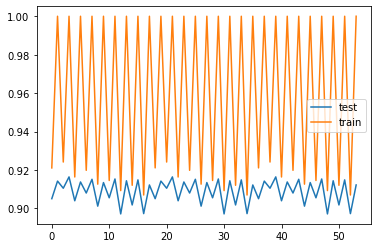

In [16]:
import  matplotlib.pyplot as plt
test_scores = gs_knn.cv_results_['mean_test_score']
#print(test_scores)
train_scores = gs_knn.cv_results_['mean_train_score'] 
#print(train_scores)

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_train_score'>

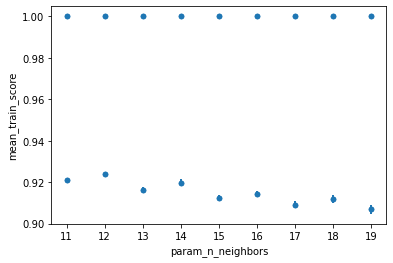

In [17]:
df_knn.plot.scatter("param_n_neighbors",'mean_train_score', yerr="std_train_score")

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

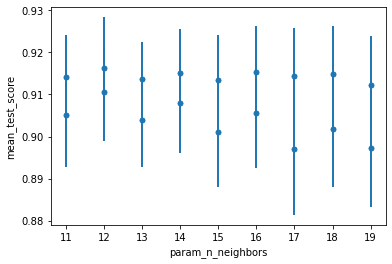

In [18]:
df_knn.plot.scatter("param_n_neighbors",'mean_test_score', yerr="std_test_score")

In [19]:
#mean cross-validated score of the best_estimator
gs_knn.best_score_ 

0.9163796934014664

In [20]:
#parameter setting that gave the best results on the hold out data.
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}

In [21]:
gs_knn.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=12, weights='distance')

### Refit the KNN model with best parameters and make prediction on test data

In [22]:
knn2 = KNeighborsClassifier(n_neighbors=11,
                           weights='distance', 
                           algorithm = 'auto', 
                           n_jobs=-1)
knn2.fit(X_train,y_train)
y_pred_knn2 =knn2.predict(X_test)
y_pred_knn2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

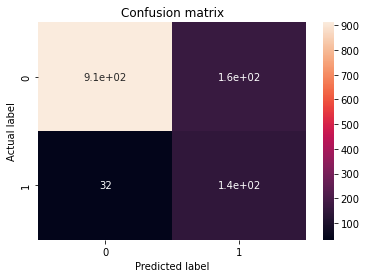

In [23]:
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

cm2 = confusion_matrix(y_test,y_pred_knn2)
sns.heatmap(cm2, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
knn2_acc = accuracy_score(y_test,y_pred_knn2)
print("Optimised KNN: Accuracy", knn2_acc)
knn2_rec = recall_score(y_test,y_pred_knn2)
print("Optimised KNN: Recall score",knn2_rec)
knn2_f1 = f1_score(y_test,y_pred_knn2)
print("Optimised KNN: F1 score",knn2_f1)
knn2_ps = precision_score(y_test,y_pred_knn2)
print("Optimised KNN: Precision score",knn2_ps)

Optimised KNN: Accuracy 0.8432
Optimised KNN: Recall score 0.8160919540229885
Optimised KNN: F1 score 0.5916666666666668
Optimised KNN: Precision score 0.46405228758169936


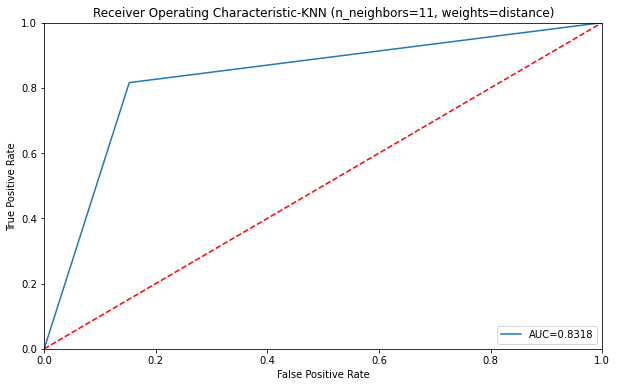

In [25]:
fpr, tpr, _ = roc_curve(y_test,y_pred_knn2)
auc = round(roc_auc_score(y_test,y_pred_knn2),4)

#create ROC curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic-KNN (n_neighbors=11, weights=distance)')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion

Since the performance of tuned KNN model is almost same as the base model, we cant say if KNN is the best model for our data.

Also for the KNN model accuracy, recall score, Precision and F1 score are higher in comparison with the Logit Regression and Decision tree classifiers that we have built.